In [9]:
import os

# Define the dataset path
data_dir = "/content/Dataset"

# Walk through the directory and print file paths
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/content/Dataset/yes/y1096.jpg
/content/Dataset/yes/y643.jpg
/content/Dataset/yes/y303.jpg
/content/Dataset/yes/y955.jpg
/content/Dataset/yes/y348.jpg
/content/Dataset/yes/y1037.jpg
/content/Dataset/yes/y1428.jpg
/content/Dataset/yes/y1422.jpg
/content/Dataset/yes/y1340.jpg
/content/Dataset/yes/y83.jpg
/content/Dataset/yes/y1361.jpg
/content/Dataset/yes/y1486.jpg
/content/Dataset/yes/y937.jpg
/content/Dataset/yes/y659.jpg
/content/Dataset/yes/y1088.jpg
/content/Dataset/yes/y1070.jpg
/content/Dataset/yes/y1444.jpg
/content/Dataset/yes/y166.jpg
/content/Dataset/yes/y857.jpg
/content/Dataset/yes/y171.jpg
/content/Dataset/yes/y858.jpg
/content/Dataset/yes/y893.jpg
/content/Dataset/yes/y1223.jpg
/content/Dataset/yes/y654.jpg
/content/Dataset/yes/y1040.jpg
/content/Dataset/yes/y853.jpg
/content/Dataset/yes/y1439.jpg
/content/Dataset/yes/y1079.jpg
/content/Dataset/yes/y1142.jpg
/content/Dataset/yes/y1119.jpg
/content/Dataset/yes/y613.jpg
/content/Dataset/yes/y662.jpg
/content/Dataset/yes/y586

In [10]:
import numpy as np
import pandas as pd
import os
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Define dataset path in Google Colab
data_dir = "/content/Dataset"

# Walk through the directory and print file paths
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/Dataset/yes/y1096.jpg
/content/Dataset/yes/y643.jpg
/content/Dataset/yes/y303.jpg
/content/Dataset/yes/y955.jpg
/content/Dataset/yes/y348.jpg
/content/Dataset/yes/y1037.jpg
/content/Dataset/yes/y1428.jpg
/content/Dataset/yes/y1422.jpg
/content/Dataset/yes/y1340.jpg
/content/Dataset/yes/y83.jpg
/content/Dataset/yes/y1361.jpg
/content/Dataset/yes/y1486.jpg
/content/Dataset/yes/y937.jpg
/content/Dataset/yes/y659.jpg
/content/Dataset/yes/y1088.jpg
/content/Dataset/yes/y1070.jpg
/content/Dataset/yes/y1444.jpg
/content/Dataset/yes/y166.jpg
/content/Dataset/yes/y857.jpg
/content/Dataset/yes/y171.jpg
/content/Dataset/yes/y858.jpg
/content/Dataset/yes/y893.jpg
/content/Dataset/yes/y1223.jpg
/content/Dataset/yes/y654.jpg
/content/Dataset/yes/y1040.jpg
/content/Dataset/yes/y853.jpg
/content/Dataset/yes/y1439.jpg
/content/Dataset/yes/y1079.jpg
/content/Dataset/yes/y1142.jpg
/content/Dataset/yes/y1119.jpg
/content/Dataset/yes/y613.jpg
/content/Dataset/yes/y662.jpg
/content/Dataset/yes/y586

In [11]:
import os

# Define dataset paths in Google Colab
tumor_dir = "/content/Dataset/yes"
no_tumor_dir = "/content/Dataset/no"

# Count images
num_tumor = len(os.listdir(tumor_dir))
num_no_tumor = len(os.listdir(no_tumor_dir))

print(f"Number of Tumor images: {num_tumor}")
print(f"Number of No-Tumor images: {num_no_tumor}")


Number of Tumor images: 1500
Number of No-Tumor images: 1500


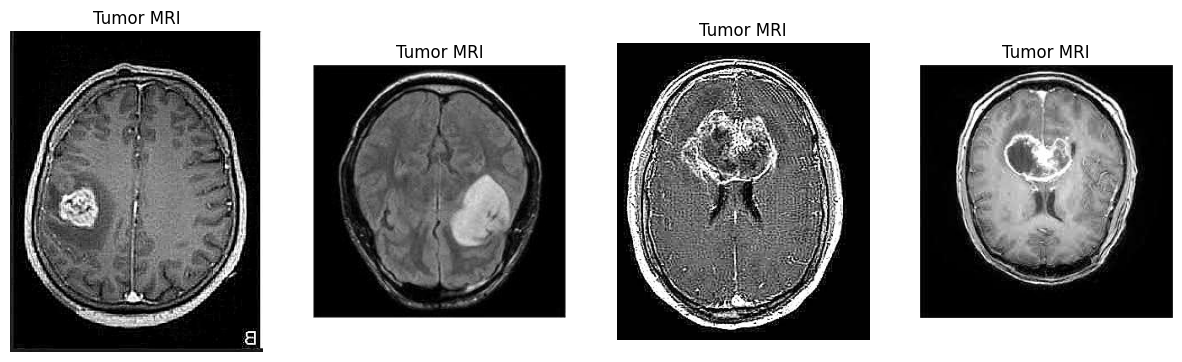

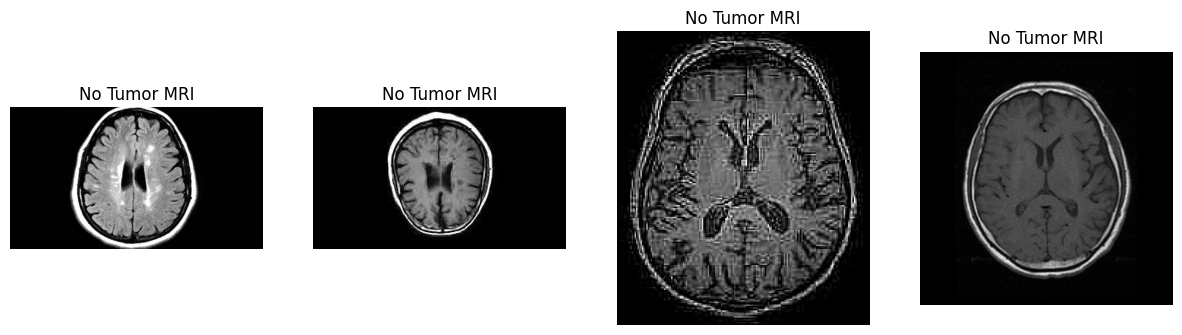

In [12]:
import matplotlib.pyplot as plt
import cv2
import random

#display images
def show_images(folder, title, num_images=4):
    images = random.sample(os.listdir(folder), num_images)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i, img_name in enumerate(images):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(title)

    plt.show()

show_images(tumor_dir, "Tumor MRI")
show_images(no_tumor_dir, "No Tumor MRI")


In [13]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# Define dataset paths in Google Colab
tumor_dir = "/content/Dataset/yes"
no_tumor_dir = "/content/Dataset/no"

# Set image size
IMG_SIZE = 128  # Resize all images to 128x128 pixels

# Function to load and preprocess images
def load_and_preprocess_data(directory, label):
    images = []
    labels = []
    for file in os.listdir(directory):
        img_path = os.path.join(directory, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 128x128
            img = img / 255.0  # Normalize pixel values (0-1)
            images.append(img)
            labels.append(label)  # Assign label (1 = Tumor, 0 = No Tumor)
    return images, labels

# Load tumor and non-tumor images
tumor_images, tumor_labels = load_and_preprocess_data(tumor_dir, 1)
no_tumor_images, no_tumor_labels = load_and_preprocess_data(no_tumor_dir, 0)

# Combine datasets
X = np.array(tumor_images + no_tumor_images)  # Features (images)
y = np.array(tumor_labels + no_tumor_labels)  # Labels (1 = Tumor, 0 = No Tumor)

# Reshape to match CNN input shape (add a channel dimension)
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # Shape: (num_samples, 128, 128, 1)

# Split data into Training (80%) and Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shape
print(f"Training set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation set: {X_val.shape}, Labels: {y_val.shape}")


Training set: (2400, 128, 128, 1), Labels: (2400,)
Validation set: (600, 128, 128, 1), Labels: (600,)


In [14]:
def apply_clahe(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply((img * 255).astype(np.uint8)) / 255.0  # Convert back to 0-1 range

# Apply CLAHE to all images
X_train = np.array([apply_clahe(img) for img in X_train])
X_val = np.array([apply_clahe(img) for img in X_val])


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    # First Conv layer
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),

    # Second Conv layer
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Third Conv layer
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Flatten the features
    Flatten(),

    # Fully connected layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevents overfitting
    Dense(1, activation='sigmoid')  # Binary classification (Tumor or No Tumor)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])






# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=16)


Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 76s 510ms/step - accuracy: 0.9800 - loss: 0.0654 - val_accuracy: 0.9733 - val_loss: 0.0763
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 76s 508ms/step - accuracy: 0.9941 - loss: 0.0250 - val_accuracy: 0.9867 - val_loss: 0.0728
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 83s 514ms/step - accuracy: 0.9928 - loss: 0.0241 - val_accuracy: 0.9883 - val_loss: 0.0609
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 82s 513ms/step - accuracy: 0.9960 - loss: 0.0110 - val_accuracy: 0.9717 - val_loss: 0.0926
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 82s 514ms/step - accuracy: 0.9898 - loss: 0.0204 - val_accuracy: 0.9850 - val_loss: 0.0903
Epoch 6/20
133/150 ━━━━━━━━━━━━━━━━━━━━ 8s 482ms/step - accuracy: 0.9994 - loss: 0.0020

In [ ]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9269 - loss: 1.1131
Validation Accuracy: 92.16%


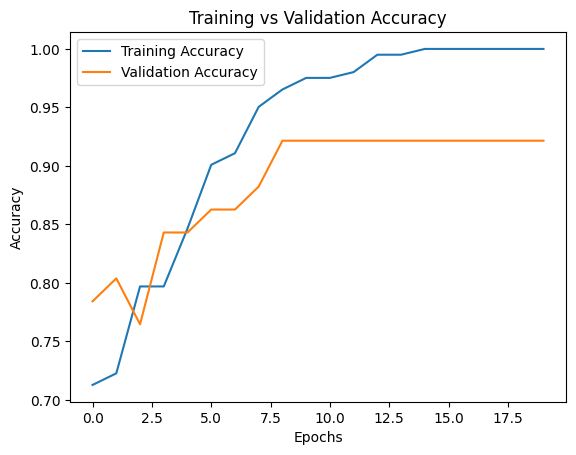

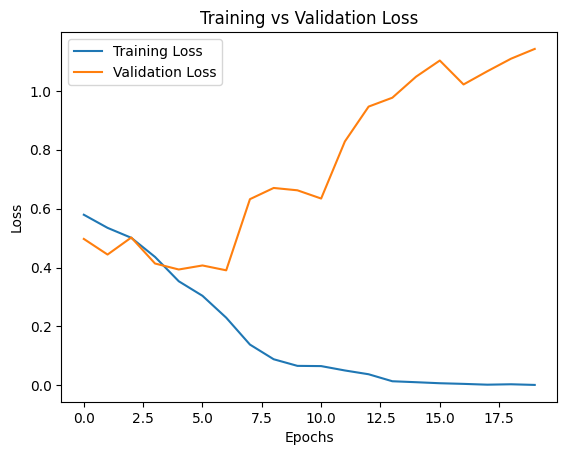

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score
y_proba = model.predict(X_val)
print("ROC-AUC Score:", roc_auc_score(y_val, y_proba))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
ROC-AUC Score: 0.9166666666666667


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


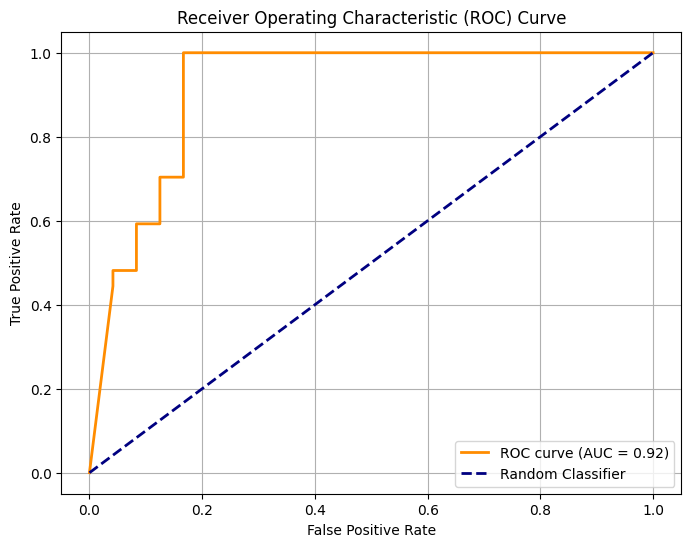

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get model predicted probabilities
y_proba = model.predict(X_val).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


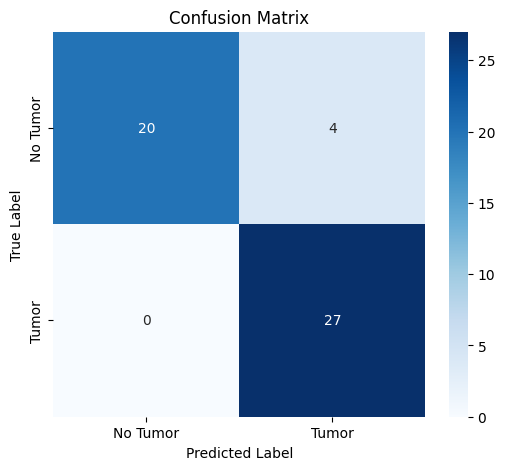


📄 Classification Report:
              precision    recall  f1-score   support

    No Tumor       1.00      0.83      0.91        24
       Tumor       0.87      1.00      0.93        27

    accuracy                           0.92        51
   macro avg       0.94      0.92      0.92        51
weighted avg       0.93      0.92      0.92        51



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class labels
y_pred = (model.predict(X_val) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_val, y_pred, target_names=["No Tumor", "Tumor"]))
